## Project Title : Epileptic Seizure Identification using Machine Learning

### Introduction
Welcome to the project! In this project, we aim to develop a Machine-Learning Framework for Epileptic Seizure Identification using Bangalore EEG Data

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load dataset
dataset = pd.read_csv("BEED_Data.csv")

## Performing Exploratory Data Analysis (EDA)

In [5]:
# 5 samples of the dataset
dataset.sample(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
2981,5,8,-2,7,17,1,0,1,4,0,20,5,14,9,14,-8,1
1570,38,-56,-132,-176,-205,-199,-162,-127,-99,-68,-15,44,92,102,46,-53,0
3943,2,-5,-9,-1,-7,2,-3,-4,10,-4,-2,-1,3,14,-6,-7,1
153,7,12,14,13,23,20,2,-11,-19,-44,-76,-74,-67,-55,-11,32,0
6386,-3,-1,-5,14,1,-8,-2,15,-1,1,-3,6,0,3,2,-3,3


In [6]:
# shape of the dataset
dataset.shape

(8000, 17)

In [7]:
# info about the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      8000 non-null   int64
 1   X2      8000 non-null   int64
 2   X3      8000 non-null   int64
 3   X4      8000 non-null   int64
 4   X5      8000 non-null   int64
 5   X6      8000 non-null   int64
 6   X7      8000 non-null   int64
 7   X8      8000 non-null   int64
 8   X9      8000 non-null   int64
 9   X10     8000 non-null   int64
 10  X11     8000 non-null   int64
 11  X12     8000 non-null   int64
 12  X13     8000 non-null   int64
 13  X14     8000 non-null   int64
 14  X15     8000 non-null   int64
 15  X16     8000 non-null   int64
 16  y       8000 non-null   int64
dtypes: int64(17)
memory usage: 1.0 MB


In [8]:
# descriptive stats of the numerical features
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,8000.0,-1.490375,36.824213,-281.0,-7.00,0.0,8.00,252.0
X2,8000.0,-2.189375,36.108088,-255.0,-7.00,0.0,8.00,261.0
X3,8000.0,-3.237500,35.802490,-255.0,-7.00,-1.0,5.00,238.0
X4,8000.0,-4.119375,36.285268,-257.0,-10.00,-1.0,7.00,246.0
X5,8000.0,-1.821625,37.621284,-264.0,-10.00,0.0,10.00,249.0
X6,8000.0,-2.311750,36.306006,-277.0,-8.00,0.0,8.00,245.0
X7,8000.0,-3.398125,36.358395,-277.0,-8.00,-1.0,6.00,220.0
X8,8000.0,-3.448625,36.522214,-260.0,-7.00,-1.0,5.00,271.0
X9,8000.0,-1.647875,38.107721,-290.0,-7.00,0.0,8.00,280.0
X10,8000.0,-2.561250,37.540680,-302.0,-8.00,0.0,8.00,251.0


In [9]:
# check for duplicate records
dataset.duplicated().sum()

np.int64(0)

In [10]:
# check for null values
dataset.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64

In [11]:
# check for number of unique values a feature have
dataset.nunique()

X1     333
X2     348
X3     339
X4     345
X5     340
X6     340
X7     350
X8     350
X9     352
X10    351
X11    343
X12    343
X13    341
X14    335
X15    342
X16    340
y        4
dtype: int64

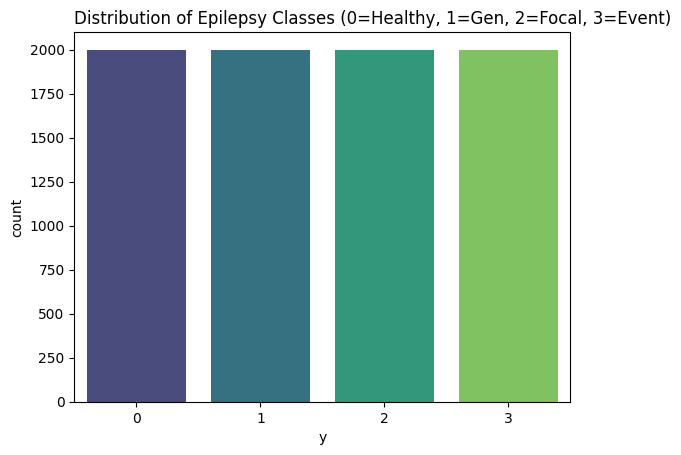

In [12]:
plt.title(label="Distribution of Epilepsy Classes (0=Healthy, 1=Gen, 2=Focal, 3=Event)", loc='left')
sns.countplot(data = dataset, x='y', palette='viridis')
plt.show()

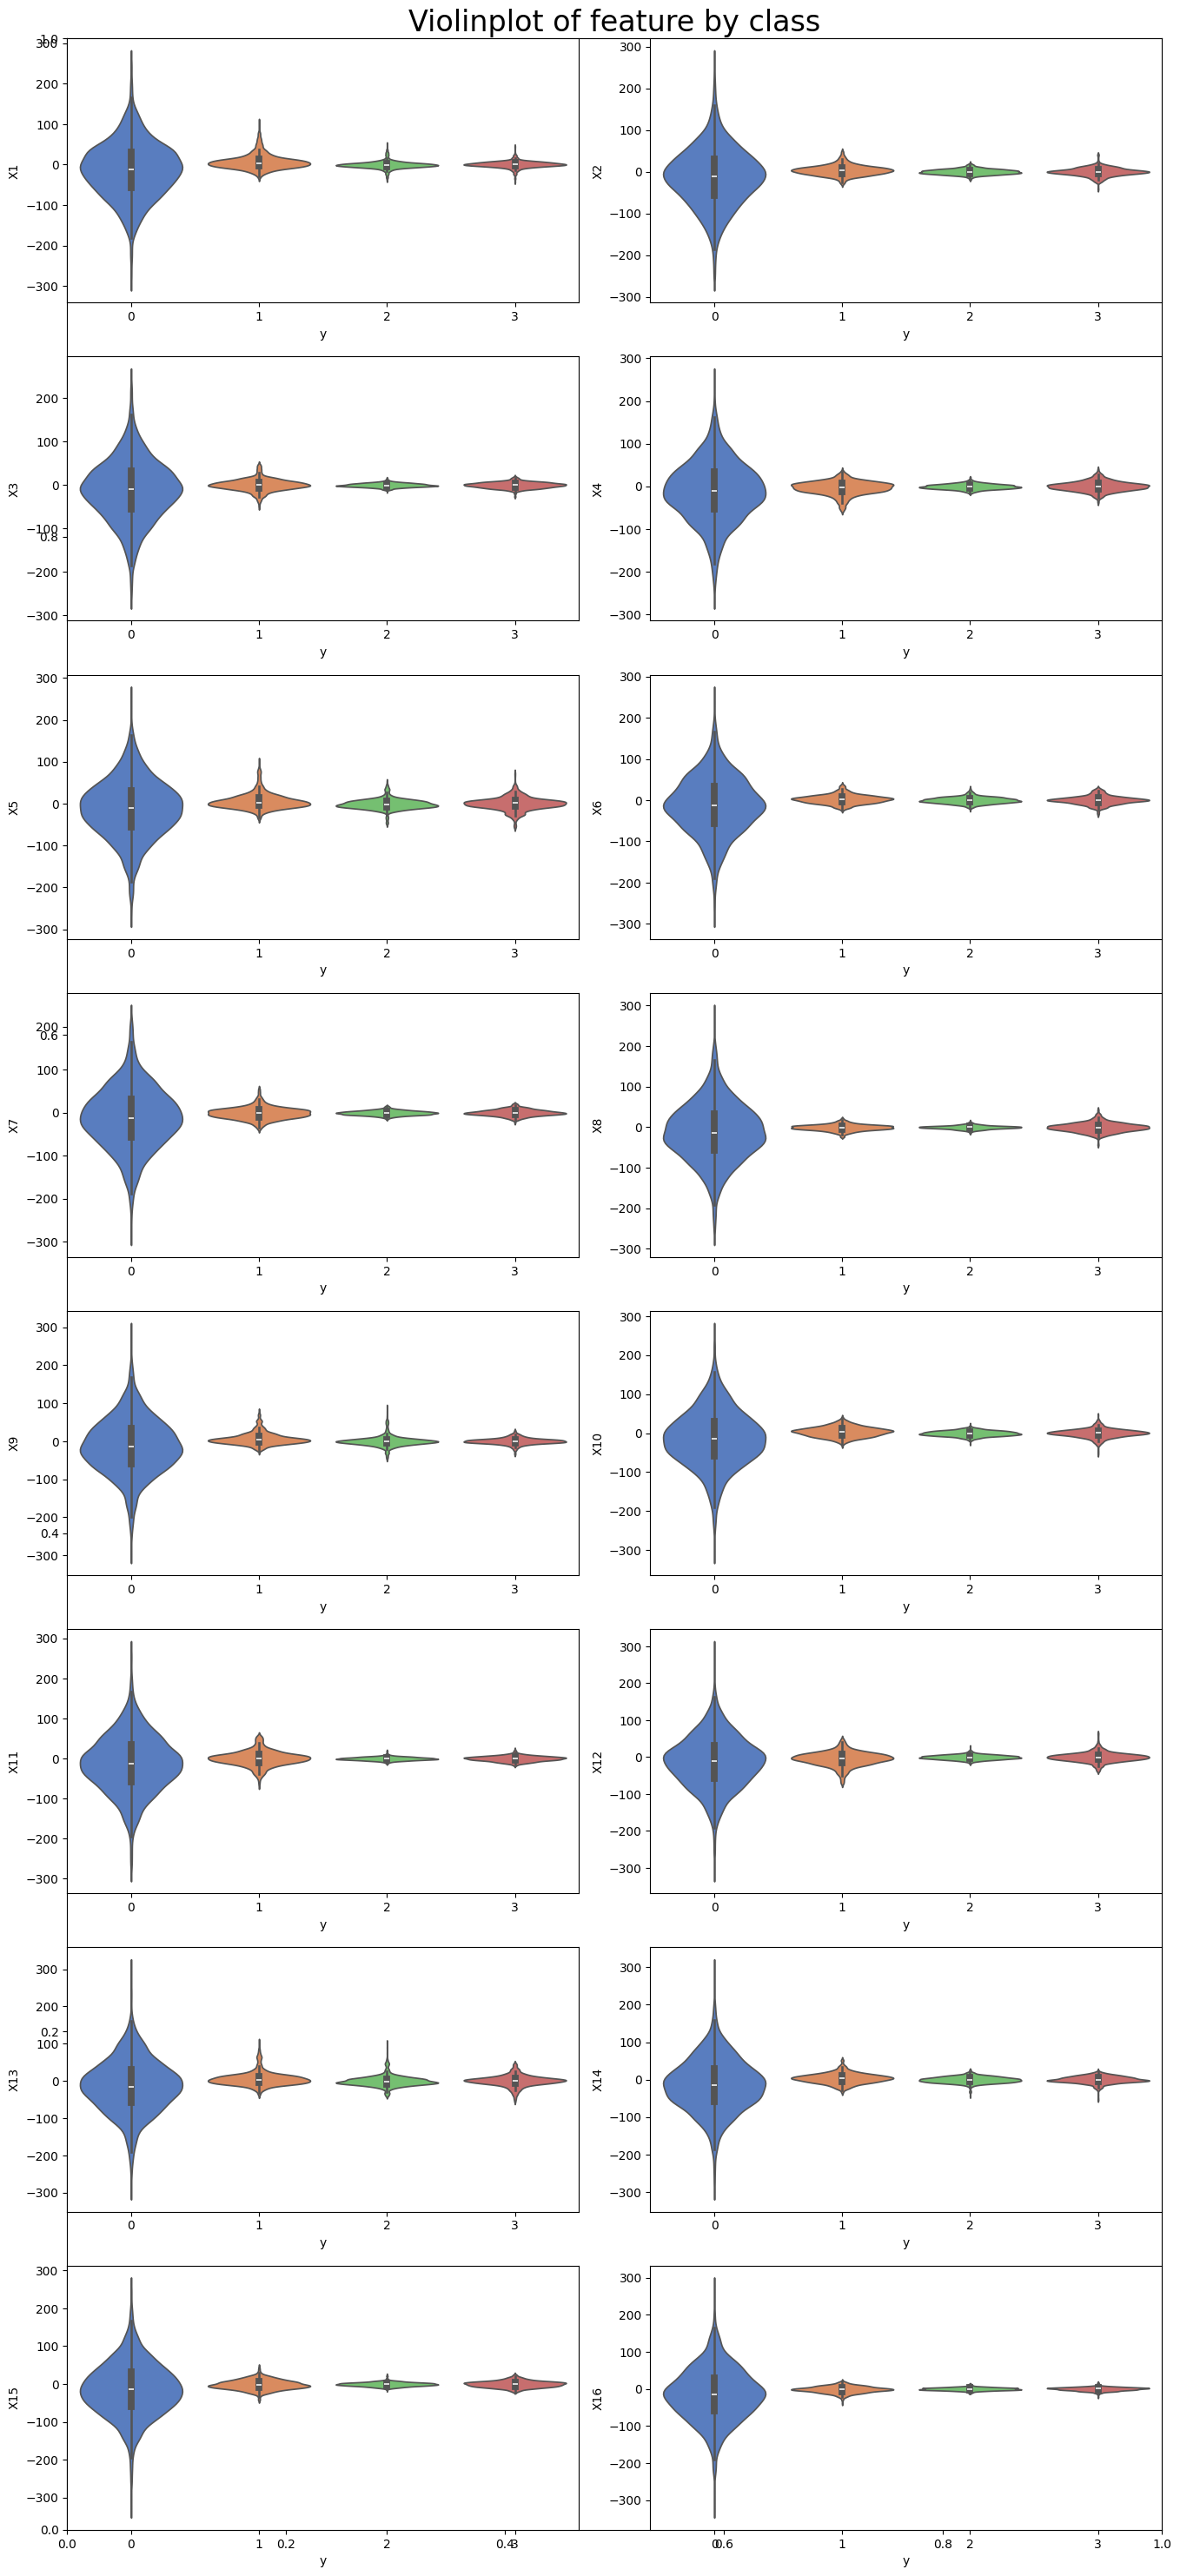

In [13]:
columns = dataset.columns.drop('y')
loc=1

plt.figure(figsize=(14,30))
plt.title(label='Violinplot of feature by class', fontsize=24)
for col in columns:
    plt.subplot(8,2,loc)
    sns.violinplot(data=dataset, y=col, x='y', palette='muted')
    loc +=1
plt.tight_layout()
plt.show()

#### Inference
1. Blue violin, Class 0 (Healthy) : It looks wide, meaning that the values for the healthy patients have a very high variance (a huge spread).
2. Seizure Classes (1, 2, 3) are almost Similar: These violins are all very tight and narrow, clustered around 0. This means that during any seizure event (class 1,2,3), the values becomes stable and shows a very low varience.
3. Using the high varience property of class 0, we can easily distinguish the healthy patient.
4. For identification of classes (1,2,3), variance property do not provide any input. Their distributions look nearly identical.

### Plotting a correlation matrix to analyze how features are correlated among them

In [14]:
# correlation matrix
corr_matrix = dataset.corr()

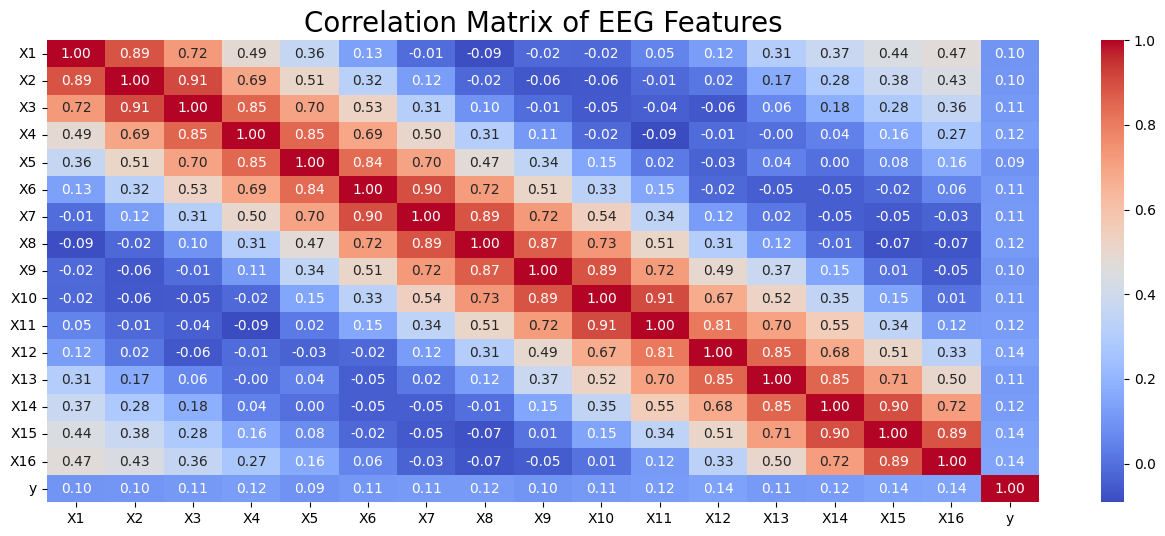

In [15]:
plt.figure(figsize=(16,6))
plt.title('Correlation Matrix of EEG Features', fontsize=20)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Inference
1. The correlation for features (X1-X16) vs target class (y) varies less from 0.09 to 0.14
2. It looks for features (X1-X16); they are highly correlated to their previous feature. Need to find the reason.
3. There is no strong linear relationship between any single feature and the target class(y). Hence, we can't just "draw a straight line" to separate a healthy patient (Class 0) from a seizure patient (Class 1, 2, or 3) using just one feature.
4. This shows the relationship between the featues (X1-X16) and the target class(y) is non linear.

### Splitting data into independent and dependent features

In [16]:
#independent feature
X=dataset.drop('y', axis=1)

#dependent feature
y=dataset['y']

In [17]:
# PCA works well when the dataset is Standardized (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

In [18]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.263792,1.060809,-0.538249,0.990023,0.298340,0.200940,0.453114,-0.418205,-0.457025,-0.031117,-0.250770,-0.034576,-0.016337,-0.197905,-0.146486,-0.043062
1,0.563661,8.235444,-0.462853,-1.793826,-0.785597,-0.147714,-0.569870,0.215249,-0.232247,0.128347,0.043951,-0.037598,0.095280,0.003614,0.062503,0.059540
2,-8.802998,-3.080356,1.134179,2.510329,-1.040372,-0.213986,-0.265147,0.054107,-0.172549,-0.014845,0.451608,0.192878,0.115516,-0.376250,-0.274713,-0.224784
3,0.059968,2.178847,-3.766412,-2.257561,1.160939,-0.000925,-0.616656,-1.673535,-0.197650,0.352311,0.863924,0.553065,-0.534168,0.338429,-0.243038,-0.137911
4,-1.995014,-5.883260,1.585770,-0.354196,0.340310,0.125447,0.057169,0.099923,-0.112625,-0.169372,-0.017655,-0.062836,-0.023641,0.014298,0.071457,0.004609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.085318,-0.152368,0.026888,0.190650,-0.142363,-0.056484,-0.540398,0.000511,-0.193760,-0.274254,0.030587,0.205136,-0.172813,-0.039648,0.013359,-0.014352
7996,-0.107371,-0.120028,0.019918,0.194633,-0.183163,-0.026259,-0.529514,0.004257,-0.167224,-0.327519,0.001489,0.206954,-0.173951,-0.026916,-0.027409,-0.010855
7997,-0.129567,-0.094171,0.017022,0.177762,-0.206137,-0.030656,-0.516580,-0.002091,-0.147781,-0.358652,-0.023046,0.175368,-0.180852,-0.061473,-0.034820,-0.000162
7998,-0.114287,-0.075639,0.036131,0.169655,-0.213578,-0.029898,-0.485251,-0.015004,-0.173418,-0.353368,-0.043190,0.165682,-0.188428,-0.083748,-0.013926,0.054681


### Using PCA to reduce the dimesions of the dataset to 4 features


In [19]:
# PCA works well when the dataset is Standardized (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_4f = PCA(n_components=4)
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_pca_4f = pd.DataFrame(pca_4f.fit_transform(X_scaled))

In [20]:
X_pca_4f

,0,1,2,3
0,1.263792,1.060809,-0.538249,0.990023
1,0.563661,8.235444,-0.462853,-1.793826
2,-8.802998,-3.080356,1.134179,2.510329
3,0.059968,2.178847,-3.766412,-2.257561
4,-1.995014,-5.883260,1.585770,-0.354196
...,...,...,...,...
7995,-0.085318,-0.152368,0.026888,0.190650
7996,-0.107371,-0.120028,0.019918,0.194633
7997,-0.129567,-0.094171,0.017022,0.177762
7998,-0.114287,-0.075639,0.036131,0.169655


### Splitting dataset into training and test data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_pca, y, test_size=.2, random_state=42)
X_train_4f, X_test_4f, y_train_4f, y_test_4f= train_test_split(X_pca_4f, y, test_size=.2, random_state=42)

In [22]:
y_train


1467    0
5768    2
5714    2
1578    0
6958    3
       ..
5226    2
5390    2
860     0
7603    3
7270    3
Name: y, Length: 6400, dtype: int64

### Classification Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [24]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [25]:
lr_4f = LogisticRegression()
lr_4f.fit(X_train_4f, y_train_4f)
lr_4f_pred_train_4f = lr_4f.predict(X_train_4f)
lr_4f_pred_test_4f = lr_4f.predict(X_test_4f)

In [26]:
svc = SVC()

svc.fit(X_train, y_train)
svc_pred_train = svc.predict(X_train)
svc_pred_test = svc.predict(X_test)

In [27]:
nv = GaussianNB()

nv.fit(X_train, y_train)
nv_pred_train = nv.predict(X_train)
nv_pred_test = nv.predict(X_test)

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

### Classificaton Matrices

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score

In [30]:
from IPython.display import Image, display

In [65]:
image_url = "https://i.sstatic.net/il5AJ.jpg"
display(Image(url=image_url, width = 600, height = 800))


#Logistic Regression
print("Logistic Regression")
lr_train_score = score(y_train, lr_pred_train)
lr_test_score = score(y_test, lr_pred_test)
print(f"Training Accuracy of the model : {lr_train_score:.2f}\n")
print(f"Test Accuracy of the model : {lr_test_score:.2f}\n")
print(f"Confusion Matrix of Test Data : \n{confusion_matrix(y_test, lr_pred_test)}\n")

#Logistic Regression
print("Logistic Regression")
lr_train_score_4f = score(y_train_4f, lr_4f_pred_train_4f)
lr_test_score_4f = score(y_test_4f, lr_4f_pred_test_4f)
print(f"Training Accuracy of the model : {lr_train_score_4f:.2f}\n")
print(f"Test Accuracy of the model : {lr_test_score_4f:.2f}\n")
print(f"Confusion Matrix of Test Data : \n{confusion_matrix(y_test_4f, lr_4f_pred_test_4f)}\n")

#SVM Classifier
print("SVM Classifier")
svc_train_score = score(y_train, svc_pred_train)
svc_test_score = score(y_test, svc_pred_test)
print(f"Training Accuracy of the model : {svc_train_score:.2f}\n")
print(f"Test Accuracy of the model : {svc_test_score:.2f}\n")
print(f"Confusion Matrix of Test Data : \n{confusion_matrix(y_test, svc_pred_test)}\n")

#Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes Classifier")
nv_train_score = score(y_train, nv_pred_train)
nv_test_score = score(y_test, nv_pred_test)
print(f"Training Accuracy of the model : {nv_train_score:.2f}\n")
print(f"Test Accuracy of the model : {nv_test_score:.2f}\n")
print(f"Confusion Matrix of Test Data : \n{confusion_matrix(y_test, nv_pred_test)}\n")

#KNN Classifier
print("KNN Classifier")
knn_train_score = score(y_train, knn_pred_train)
knn_test_score = score(y_test, knn_pred_test)
print(f"Training Accuracy of the model : {knn_train_score:.2f}\n")
print(f"Test Accuracy of the model : {knn_test_score:.2f}\n")
print(f"Confusion Matrix of Test Data : \n{confusion_matrix(y_test, knn_pred_test)}\n")

Logistic Regression
Training Accuracy of the model : 0.24

Test Accuracy of the model : 0.25

Confusion Matrix of Test Data : 
[[ 51 116 118 115]
 [ 72 121  95 112]
 [ 60 112 121 107]
 [ 73 117 107 103]]

Logistic Regression
Training Accuracy of the model : 0.46

Test Accuracy of the model : 0.43

Confusion Matrix of Test Data : 
[[203 129  47  46]
 [ 40 232  93  14]
 [ 12 121 219  45]
 [ 27 165 166  41]]

SVM Classifier
Training Accuracy of the model : 0.25

Test Accuracy of the model : 0.24

Confusion Matrix of Test Data : 
[[ 99  72 187  42]
 [120  78 162  40]
 [ 88  94 166  52]
 [111  78 166  45]]

Gaussian Naive Bayes Classifier
Training Accuracy of the model : 0.25

Test Accuracy of the model : 0.25

Confusion Matrix of Test Data : 
[[ 99  65 173  63]
 [120  84 157  39]
 [ 94  83 155  68]
 [112  74 152  62]]

KNN Classifier
Training Accuracy of the model : 0.98

Test Accuracy of the model : 0.97

Confusion Matrix of Test Data : 
[[392   4   0   4]
 [  0 380  11   9]
 [  0   2 386

### Added RBF Kernel in SVM 

In [32]:
# Standard Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# RBF SVM Model

svm_rbf = SVC(kernel='rbf', C=10, gamma='scale')  

svm_rbf.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_rbf.predict(X_test_scaled)

# Evaluation

acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
cr  = classification_report(y_test, y_pred)

print("RBF SVM Classifier")
print(f"Test Accuracy: {acc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


RBF SVM Classifier
Test Accuracy: 0.9350

Confusion Matrix:
[[421   2   0   2]
 [  0 354  10  15]
 [  0   4 378  15]
 [  0   5  51 343]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       425
           1       0.97      0.93      0.95       379
           2       0.86      0.95      0.90       397
           3       0.91      0.86      0.89       399

    accuracy                           0.94      1600
   macro avg       0.94      0.93      0.93      1600
weighted avg       0.94      0.94      0.94      1600



In [54]:
#split data for Decision Tree
X_train_dt, X_test_dt, y_train_dt, y_test_dt= train_test_split(X, y, test_size=.2, random_state=42)

### Decision Tree Classifier Model Implementation

In [55]:
# Create the model
dt = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=None,       
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)




In [56]:
# Train the model
dt.fit(X_train_dt, y_train_dt)

# Predictions
dt_pred_train_dt = dt.predict(X_train_dt)
dt_pred_test_dt = dt.predict(X_test_dt)


In [57]:
# Accuracy
print("Decision Tree Classifier")
print(f"Training Accuracy  : {accuracy_score(y_train_dt, dt_pred_train_dt):.4f}")
print(f"Testing Accuracy   : {accuracy_score(y_test_dt, dt_pred_test_dt):.4f}\n")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred_test_dt), "\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_pred_test_dt))

Decision Tree Classifier
Training Accuracy  : 1.0000
Testing Accuracy   : 0.8806

Confusion Matrix:
[[408   7   2   8]
 [  2 331  14  32]
 [  0  12 346  39]
 [  0  26  49 324]] 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       425
           1       0.88      0.87      0.88       379
           2       0.84      0.87      0.86       397
           3       0.80      0.81      0.81       399

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [8, 10, 12, 14, 16, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.8684375


In [ ]:

#KNN Classifier with Standard Scaling
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

In [61]:
# Evaluation
print("KNN Classifier")
print("Training Accuracy :", round(knn.score(X_train_scaled, y_train), 4))
print("Testing Accuracy  :", round(accuracy_score(y_test, y_pred), 4))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Classifier
Training Accuracy : 0.9822
Testing Accuracy  : 0.9706

Confusion Matrix:
[[389   5   0   6]
 [  0 380  11   9]
 [  0   2 388  10]
 [  0   0   4 396]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       400
           1       0.98      0.95      0.97       400
           2       0.96      0.97      0.97       400
           3       0.94      0.99      0.96       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



## Solving this problem using a multilayer perceptron classification model

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
MLP = MLPClassifier(hidden_layer_sizes=(16,32,32,16,4), max_iter=500)

In [37]:
MLP.fit(X_train, y_train.values.ravel())

,hidden_layer_sizes,"(16, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,None


In [38]:
MLP_X_train_Pred = MLP.predict(X_train)
MLP_X_test_Pred = MLP.predict(X_test)

In [39]:
MLP_X_train_Pred

array([0, 2, 2, ..., 0, 3, 3], shape=(6400,))

In [40]:
print("MLP Classifier")
MLP_train_score = score(y_train, MLP_X_train_Pred)
MLP_test_score = score(y_test, MLP_X_test_Pred)
print(f"Training Accuracy of the model : {MLP_train_score:.2f}\n")
print(f"Test Accuracy of the model : {MLP_test_score:.2f}\n")

MLP Classifier
Training Accuracy of the model : 0.99

Test Accuracy of the model : 0.91



In [41]:
print(f"Confusion Matrix of Test Data : \n{confusion_matrix(y_test, MLP_X_test_Pred)}\n")

Confusion Matrix of Test Data : 
[[415   9   0   1]
 [  2 337  13  27]
 [  0   6 352  39]
 [  0  16  39 344]]



In [42]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [43]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp= train_test_split(X_scaled, y, test_size=.2, random_state=42)

In [44]:

mlp = MLPClassifier(
    hidden_layer_sizes=(16, 32, 32, 16, 4),
    max_iter=500,
    random_state=42
)

# Train the model
mlp.fit(X_train_mlp, y_train_mlp)

# Predict on test data
y_pred_mlp = mlp.predict(X_test_mlp)


print("Test Accuracy:", accuracy_score(y_test_mlp, y_pred_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_mlp, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test_mlp, y_pred_mlp))

Test Accuracy: 0.941875

Confusion Matrix:
 [[421   1   0   3]
 [  3 352  10  14]
 [  0   7 373  17]
 [  0  10  28 361]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.95      0.93      0.94       379
           2       0.91      0.94      0.92       397
           3       0.91      0.90      0.91       399

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

